In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
#regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
#save model
from joblib import dump

# Read Data

In [2]:
data1=pd.read_csv('/content/Data_project (1).csv')

In [3]:
data1.head()

,Unnamed: 0,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Description,Requirments,Job Skills
0,0,Senior/Mid Senior Deep Learning Engineer,Confidential,"Mokattam, Cairo",Egypt,['Full Time'],Experienced,"['Reviewing, replicating, and mapping research...",['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...
1,1,ML Engineer - Recommendation System,TensorGraph,"Maadi, Cairo",Egypt,"['Part Time', 'Freelance / Project']",Entry Level,['Build and Improve the existing recommendatio...,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...
2,2,Full Stack Developer,Trufla,"Heliopolis, Cairo",Egypt,['Internship'],Entry Level,['Interact with the product team to understand...,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...
3,3,Data Scientist,Confidential,Riyadh,Saudi Arabia,['Full Time'],Experienced,"['Selecting features, building, and optimizing...",['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...
4,4,Senior Data Scientist,BBI-Consultancy,"Nasr City, Cairo",Egypt,['Full Time'],Experienced,['Identify valuable data sources and automate ...,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...


In [4]:
data1.tail()

,Unnamed: 0,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Description,Requirments,Job Skills
336,336,Software Engineering Manager,Neureveal,Cairo,Egypt,['Full Time'],Manager,['Collaborating with prospective users and cli...,['Bachelor’s degree in Computer Science is pre...,Bachelor's degree in Computer Science|Years of...
337,337,Senior Automation QC Engineer,PSH,"Maadi, Cairo",Egypt,['Full Time'],Experienced,['Identifying and selecting the automation tes...,['Bachelor’s degree in Computer Science/Comput...,Bachelor's degree in Computer Engineering||Yea...
338,338,Senior Software QC Engineer,Confidential,"Sheraton, Cairo",Egypt,['Full Time'],Experienced,['Primarily testing of Product release; includ...,"['years of experience in a related field, a ba...",Bachelor's degree in Computer Science|Years of...
339,339,Software Quality Assurance Specialist,Wakeb Data,"Mohandessin, Giza",Egypt,['Full Time'],Experienced,"['Develop and maintain standards, tools, techn...",['Bachelor’s degree in Computer Science or equ...,Bachelor’s degree in Computer Science|Years of...
340,340,Software Engineer (React JS,Qoyod,"Maadi, Cairo",Egypt,['Full Time'],Experienced,['Leverage the inbuilt React toolkit for creat...,"['Engineering', 'IT or Computer Science']",Bachelor's degree in Information Technology|Ye...


Data Exploration

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         341 non-null    int64 
 1   Job Title          341 non-null    object
 2   Company Name:      341 non-null    object
 3   Location           341 non-null    object
 4   Country            341 non-null    object
 5   Employment Type    341 non-null    object
 6   Experience Needed  341 non-null    object
 7   Description        341 non-null    object
 8   Requirments        340 non-null    object
 9   Job Skills         341 non-null    object
dtypes: int64(1), object(9)
memory usage: 26.8+ KB


In [6]:
data1.duplicated().sum()

np.int64(0)

In [7]:
data1.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Company Name:,0
Location,0
Country,0
Employment Type,0
Experience Needed,0
Description,0
Requirments,1
Job Skills,0


In [8]:
data1['Job Title'].unique()

array(['Senior/Mid Senior Deep Learning Engineer',
       'ML Engineer - Recommendation System', 'Full Stack Developer',
       'Data Scientist', 'Senior Data Scientist',
       'Data Science Instructor', 'Senior Data Engineer',
       'Mechanical Production Engineer',
       'Mechanical Engineer ( Production', 'Software Architect',
       'Java Technical Lead', 'Research Software Development Engineer',
       'Mechanical Engineer', 'Pre Sales Engineer',
       'Production Engineer - Plastic Field',
       'Data Scientist “Mathematics/Physics',
       'Senior C++ Software Developer', 'Data Engineer',
       'Senior Full Stack Developer', 'Application Support Engineer',
       'Odoo Developer & Pre-Sales Specialist',
       'Production Engineer - Rodniture Furniture',
       'Data Analysis Instructor (Excel - Power BI', 'Sales Engineer',
       'Artificial Intelligence (AI) Engineer',
       'Senior Python / Django Developer', 'Business Analyst',
       'Microsoft CRM Developer', 'Junio

In [9]:
data1['Requirments'].value_counts()

,count
Requirments,
"['Required Years of experience: 5+ years of experience', 'Who you are', 'You will be highly hands-on and enjoy keeping up with the latest innovations. With a very good grasp of a broad set of machine learning algorithms and software engineering skills, you will have a machine learning / mathematical / statistical background', 'As a Data scientist you will apply your deep analytics expertise, designing and implementing end to end unstructured data mining of large scale big data platforms. Apply semantic correlation, ontology, and text analytics techniques to analyze un-structured data and identify critical insights', 'You will participate in feature / design discussions / workshop with Architect and the offering Management Teams to come up with innovative solutions that can scale', 'What you know', 'Defining the business problem and working hypothesis', 'Helping to locate/resolve data/quality issues', 'Proficient in the following: Python, R, Java, SQL', 'Proficient at consuming and building REST APIs', 'Proficient at integrating predictive/prescriptive models into applications and processes', 'Training and experience applying probability and statistics', 'Experience in data modeling and evaluation and a deep understanding of supervised andunsupervised machine learning', 'Experience applying mathematical modeling and/or constraint programming to a range ofindustry problems', 'Ability to apply predictive models as input into decision optimization problems', 'Experience building Monte Carlo simulation/optimization for what-if scenario analysis', 'Experience integrating data and the output of predictive and prescriptive models within thecontext of a business problem', 'Proficiency with data parsing, scraping, and wrangling', 'Software life cycle, from analysis, design development, to unit testing, productiondeployment and support']",4
"['University Degree in Computer Science, Computer Engineering or a related field', 'years of relevant experience', 'Experience with API\xa0testing\xa0tools (ex. Postman, Katalon Studio', 'Experience working with performance\xa0testing\xa0tools (ex. JMeter', 'Strong knowledge of automation\xa0testing\xa0tools (ex. Selenium, Appuim', 'Security\xa0testing\xa0background is a preferable', 'Good knowledge of database systems', 'Ability to support and mentor junior\xa0testers', 'Can work with Linux systems', 'Experience with mobile\xa0testing']",3
"['Job Requirements', 'Strong analytical skills and comfortable dealing with numerical data for the development of data-driven reports', 'Strong written and verbal communication skills to effectively relate data to coworkers', 'Demonstrable experience as a reporting analyst', 'Strong report writing abilities', 'BSc. in any discipline', 'Fluent in English', 'years’ experience in a similar role']",3
"['Bachelor’s degree in computer science Or Software Engineering\xa0preferably AUC or GUC Alumni', 'years of\xa0relative\xa0experience', 'years of people\xa0management experience, managing engineers', 'Solid\xa0experience architecting and designing (architecture, design patterns, reliability, and scaling) of new and current systems', 'Java Full stack , PHP , full stack\xa0 & SW mobile application (IOS, Android) architect experience is a must', 'Solid software development background including design patterns, data structures, and test driven development', 'Ability to handle multiple, competing priorities in a fast-paced environment, and navigate ambiguity', 'A deep understanding of the software development life-cycle, and a track record of shipping software on time', 'Experience designing software architectures for scalability, reliability, and performance', 'Excellent verbal and written communication skills', 'A passion for people management and mentorship']",3
"['BS/MS degree in Computer Science, Engineering or a related subject', 'Proven hands-on Proven experience as software architect', 'years experience as an individual Software Engineer contribu

In [10]:
data1['Job Skills'].value_counts()

,count
Job Skills,
"Bachelor's degree in Accounting|Experience in Finance and financial analysis|Project Management|Good Understanding in data mining tools such as SQL, Access|Excellent in PowerPoint and Excel|Communication skills.",2
"Degree in Computer Science|Experirnce in HTML,CSS,and JavaScript|Experience in software development|Understanding of UX|Communication skills |Working with teams.",2
"Software Engineering|Strong in Python|Software developer|Basic understanding of front-end technologies, such as JavaScript, HTML5, and CSS|Git|Basics in Database technique|SQL|Problem-Solving|Communication skills.",2
"Computer Science | Computer Engineering | Python|TensorFlow|OpenCV| Deep Learning |Processing of Images|Ability and willingness to continuously learn, adapt to new technologies|Problem-Solving.",2
"Bachelor’s degree in Computer Science|have Strong background in software testing and analysis|Years of experience with quality assurance and system analysis|Good knowledge of databases,and APIs|Experience in system analysis design, creating diagrams, and documentation|Strong in report on bugs,and report on test results|Communication and Problem solving skills.",1
...,...
Faculty of Business|Experience in Market research and market analysis|Working with Data analysis|Experience in Microsoft Office|Fluency in English|Working with teams.,1
Degree in Commerce|Excellent in Microsoft Office|Experience in working with accounting software ERP systems and Sales|Fluency in English|Good understanding of data analysis|Communication skills|Time Management.,1
Bachelor's degree in Computer Science|Proficiency in configuring enterprise-class routers and switches|Experience in Unix systems administration|Strong in Problem-Solving|Good understanding of troubleshooting network protocols|Communication and Adaptability skills.,1


# Data Preprocessing

In [11]:
data1.head()

,Unnamed: 0,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Description,Requirments,Job Skills
0,0,Senior/Mid Senior Deep Learning Engineer,Confidential,"Mokattam, Cairo",Egypt,['Full Time'],Experienced,"['Reviewing, replicating, and mapping research...",['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...
1,1,ML Engineer - Recommendation System,TensorGraph,"Maadi, Cairo",Egypt,"['Part Time', 'Freelance / Project']",Entry Level,['Build and Improve the existing recommendatio...,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...
2,2,Full Stack Developer,Trufla,"Heliopolis, Cairo",Egypt,['Internship'],Entry Level,['Interact with the product team to understand...,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...
3,3,Data Scientist,Confidential,Riyadh,Saudi Arabia,['Full Time'],Experienced,"['Selecting features, building, and optimizing...",['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...
4,4,Senior Data Scientist,BBI-Consultancy,"Nasr City, Cairo",Egypt,['Full Time'],Experienced,['Identify valuable data sources and automate ...,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...


In [12]:
#drop Unnamed: 0 column
data1.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
data1.head()

,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Description,Requirments,Job Skills
0,Senior/Mid Senior Deep Learning Engineer,Confidential,"Mokattam, Cairo",Egypt,['Full Time'],Experienced,"['Reviewing, replicating, and mapping research...",['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...
1,ML Engineer - Recommendation System,TensorGraph,"Maadi, Cairo",Egypt,"['Part Time', 'Freelance / Project']",Entry Level,['Build and Improve the existing recommendatio...,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...
2,Full Stack Developer,Trufla,"Heliopolis, Cairo",Egypt,['Internship'],Entry Level,['Interact with the product team to understand...,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...
3,Data Scientist,Confidential,Riyadh,Saudi Arabia,['Full Time'],Experienced,"['Selecting features, building, and optimizing...",['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...
4,Senior Data Scientist,BBI-Consultancy,"Nasr City, Cairo",Egypt,['Full Time'],Experienced,['Identify valuable data sources and automate ...,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...


In [14]:
#handle missing values in Requirments column ---> dropna()
data1.dropna(subset=['Requirments'],inplace=True)

In [15]:
data1.isnull().sum()

,0
Job Title,0
Company Name:,0
Location,0
Country,0
Employment Type,0
Experience Needed,0
Description,0
Requirments,0
Job Skills,0


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 340
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          340 non-null    object
 1   Company Name:      340 non-null    object
 2   Location           340 non-null    object
 3   Country            340 non-null    object
 4   Employment Type    340 non-null    object
 5   Experience Needed  340 non-null    object
 6   Description        340 non-null    object
 7   Requirments        340 non-null    object
 8   Job Skills         340 non-null    object
dtypes: object(9)
memory usage: 26.6+ KB


In [17]:
data1['Description'].value_counts()

,count
Description,
"['Design and Develop analytical insights based on unstructured and structured data for industry-scaleanalytical solutions on Cloud and on Prem', 'Convert requirements into actual working modules', 'Work with Data Scientists and Distinguished Engineers and Architects to solve problems by using analytics as a tool']",4
"['Communicate with clients to understand their vision of what they want their product to be', 'Take part in design meetings, where all technical and non-technical decisions will be made', 'Effectively collaborate with industry professionals to ensure you deliver the best product possible', 'Work on implementing the actual product, and constantly getting feedback on your work', 'Constantly test and improve, to make sure everything is up to flawless standards', 'Deliver a complete product, and follow up with our clients to ensure they are satisfied with their amazing product']",3
"['On behalf of a Leading Trading & Distribution Co.,Partner & More is recruiting:#HR_Reporting #AnalystLocation: Head Quarter –\xa0#Abu_RawashJob Responsibility', 'Design HR department analysis and data recording systems for use throughout the HR Functions', 'Maintain databases and perform updates as necessary to ensure accuracy', 'Regularly examine data reports to locate and resolve mistakes throughout', 'Accurately analyze and collect data for various types of business reports', 'Create business reports that provide insight into key data points', 'Communicate the results of data analysis in written and verbal form to managers', 'Monitor data to identify changes in financial and business trends']",3
"['We are looking for an experienced Software Architect to make intuitive high level decisions for software development', 'You will see the “big picture” and create architectural approaches for software design and implementation to guide the development team']",3
"['Formulate techniques for quality data collection to ensure adequacy, accuracy and legitimacy of data', 'Devise and implement efficient and secure procedures for data handling and analysis with attention to all technical aspects', 'Support others in the daily use of data systems and ensure adherence to legal and company standards', 'Assist with reports and data extraction when needed', 'Monitor and analyze information and data systems and evaluate their performance to discover ways of enhancing them (new technologies, upgrades etc', 'Ensure digital databases and archives are protected from security breaches and data losses', 'Troubleshoot data-related problems and authorize maintenance or modifications']",3
...,...
"['Analysing data to identify trends and patterns in financial markets, using statistical techniques such as regression analysis or time series analysis', 'Tracking and reporting cash flow to ensure that payments are made on time and that excess funds are available to meet short-term obligations', 'Providing information to management regarding the company’s liquidity position by analysing cash flow forecasts', 'Participating in budget preparation and monitoring by creating budgets based on projected sales figures and other financial data', 'Evaluating investment opportunities based on the company’s risk tolerance and objectives', 'Preparing reports detailing cash flow activity, including collections and disbursements, for internal use by management or external use by investors', 'Monitoring business performance against budget projections and identifying any deviations that may require corrective action', 'Reviewing financial statements to ensure they comply with Generally Accepted Accounting Principles (GAAP) or International Financial Reporting Standards (IFRS', 'Preparing cash flow analyses that identify potential problems with cash flow or identify opportunities for improving cash flow']",1
"['Demonstrate up-to-date expertise in Information Systems and apply this to the development, execution, and improvement of action plans by providing advice an

In [18]:
#Drop Description Column from data
data1.drop(columns=['Description'],axis=1,inplace=True)

In [19]:
data1.head()

,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Requirments,Job Skills
0,Senior/Mid Senior Deep Learning Engineer,Confidential,"Mokattam, Cairo",Egypt,['Full Time'],Experienced,['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...
1,ML Engineer - Recommendation System,TensorGraph,"Maadi, Cairo",Egypt,"['Part Time', 'Freelance / Project']",Entry Level,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...
2,Full Stack Developer,Trufla,"Heliopolis, Cairo",Egypt,['Internship'],Entry Level,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...
3,Data Scientist,Confidential,Riyadh,Saudi Arabia,['Full Time'],Experienced,['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...
4,Senior Data Scientist,BBI-Consultancy,"Nasr City, Cairo",Egypt,['Full Time'],Experienced,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...


In [20]:
#ColumnsTransformer to encoding
le_encode=LabelEncoder()
on_encode=OneHotEncoder()

In [21]:
data1['Job Title'] = le_encode.fit_transform(data1['Job Title'])

In [22]:
data1['Company Name: '] = le_encode.fit_transform(data1['Company Name: '])

In [23]:
data1['Location'] = le_encode.fit_transform(data1['Location'])

In [24]:
# Reshape the 'Country' column into a 2D array
data1['Country'] = on_encode.fit_transform(data1[['Country']]).toarray()

In [25]:
data1['Employment Type']= le_encode.fit_transform(data1['Employment Type'])

In [26]:
data1['Experience Needed']=le_encode.fit_transform(data1['Experience Needed'])

In [27]:
data1.head()

,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Requirments,Job Skills
0,184,40,19,1.0,6,1,['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...
1,79,181,16,1.0,8,0,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...
2,56,188,12,1.0,7,0,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...
3,35,40,27,0.0,6,1,['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...
4,135,24,20,1.0,6,1,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...


In [30]:
tfidf_vectorizer=TfidfVectorizer(max_features=100)

In [31]:
required_skills_tf=tfidf_vectorizer.fit_transform(data1['Requirments']).toarray()

In [32]:
user_skills_tf=tfidf_vectorizer.transform(data1['Job Skills']).toarray()

In [33]:
#calculate cosine similarity
cos_similarities=[cosine_similarity(required_skills_tf[i].reshape(1, -1),user_skills_tf[i].reshape(1, -1))[0][0] for i in range(len(data1))]
data1['Cosine_Similarity']=cos_similarities

In [34]:
data1['Match_Percentage']=data1['Cosine_Similarity']*100
print(data1)

     Job Title  Company Name:   Location  Country  Employment Type  \
0          184              40        19      1.0                6   
1           79             181        16      1.0                8   
2           56             188        12      1.0                7   
3           35              40        27      0.0                6   
4          135              24        20      1.0                6   
..         ...             ...       ...      ...              ...   
336        198             130         5      1.0                6   
337        121             141        16      1.0                6   
338        164              40        31      1.0                6   
339        203             196        17      1.0                6   
340        195             149        16      1.0                6   

     Experience Needed                                        Requirments  \
0                    1  ['Completed Master’s degree or higher in Artif...   
1    

In [35]:
data1.head()

,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Requirments,Job Skills,Cosine_Similarity,Match_Percentage
0,184,40,19,1.0,6,1,['Completed Master’s degree or higher in Artif...,Analysis |Data Pre-processing | Communication ...,0.274085,27.408481
1,79,181,16,1.0,8,0,"['BA in Computer Science and similar fields', ...",Data Analysis|Python|Machine Learning Algorith...,0.406870,40.686990
2,56,188,12,1.0,7,0,['Bachelor of Computer Science or any related ...,Computer Science|sowftwate developer|Java|HTML...,0.405605,40.560503
3,35,40,27,0.0,6,1,['Strong applied mathematical and statistical ...,Computer Science || Data Science | Java | Pyth...,0.552446,55.244593
4,135,24,20,1.0,6,1,"['BSc/BA in Computer Science, Engineering or r...",Computer Science | Engineering |Engineering| S...,0.588042,58.804219


In [36]:
required_skills_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.07395708,
        0.        ],
       [0.1094791 , 0.        , 0.        , ..., 0.        , 0.07694894,
        0.        ],
       [0.        , 0.        , 0.11225466, ..., 0.        , 0.        ,
        0.17355418],
       ...,
       [0.16684577, 0.        , 0.        , ..., 0.10111395, 0.05863496,
        0.        ],
       [0.        , 0.        , 0.11984917, ..., 0.11859475, 0.0687719 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
user_skills_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38587193, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.08137033,
        0.        ],
       [0.        , 0.        , 0.16338247, ..., 0.        , 0.0937522 ,
        0.        ],
       [0.24193017, 0.        , 0.        , ..., 0.        , 0.08502202,
        0.        ]])

In [38]:
data1['Match_Percentage'].value_counts()

,count
Match_Percentage,
0.000000,4
45.679929,2
56.495248,1
68.321311,1
51.722492,1
...,...
60.022181,1
53.032224,1
45.046714,1


# Data Visualization

<Axes: xlabel='Job Title', ylabel='Cosine_Similarity'>

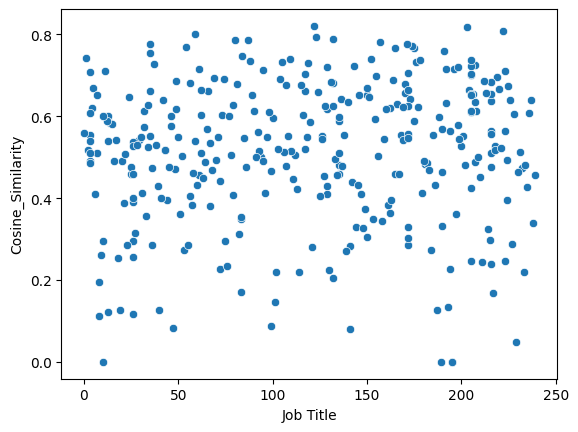

In [39]:
sns.scatterplot(x = 'Job Title', y = 'Cosine_Similarity', data = data1)

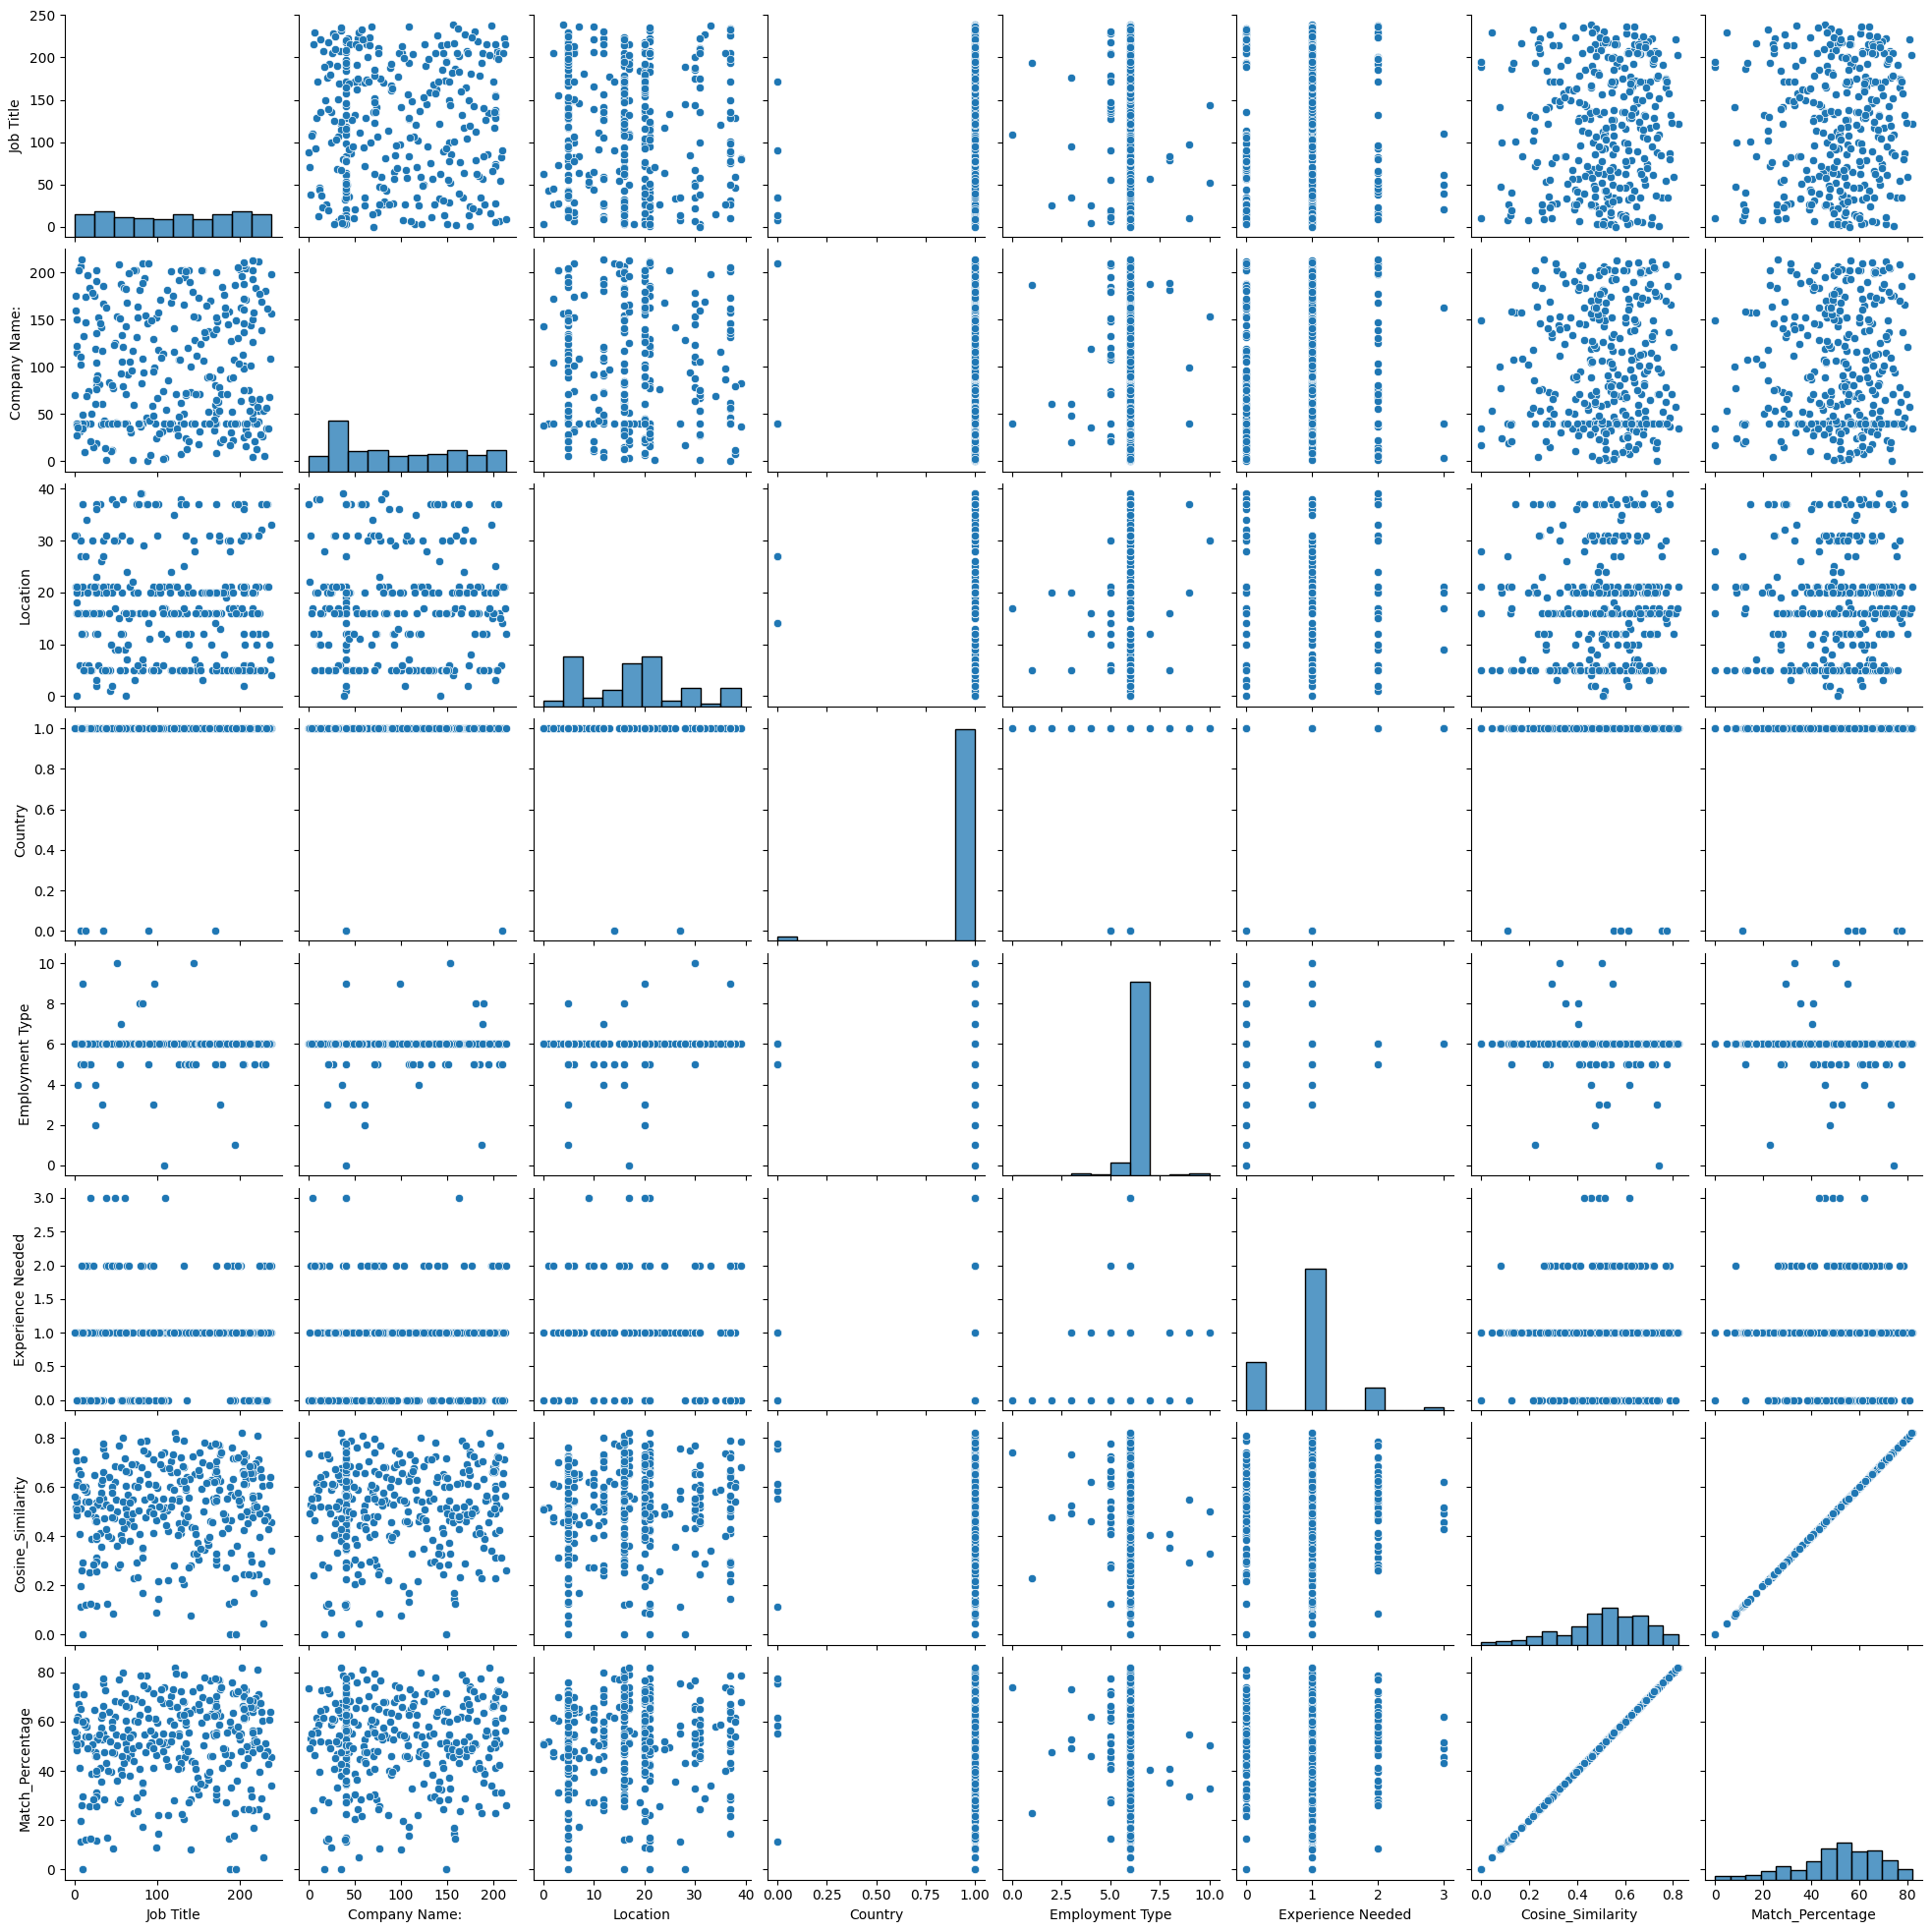

In [40]:
sns.pairplot(data1)

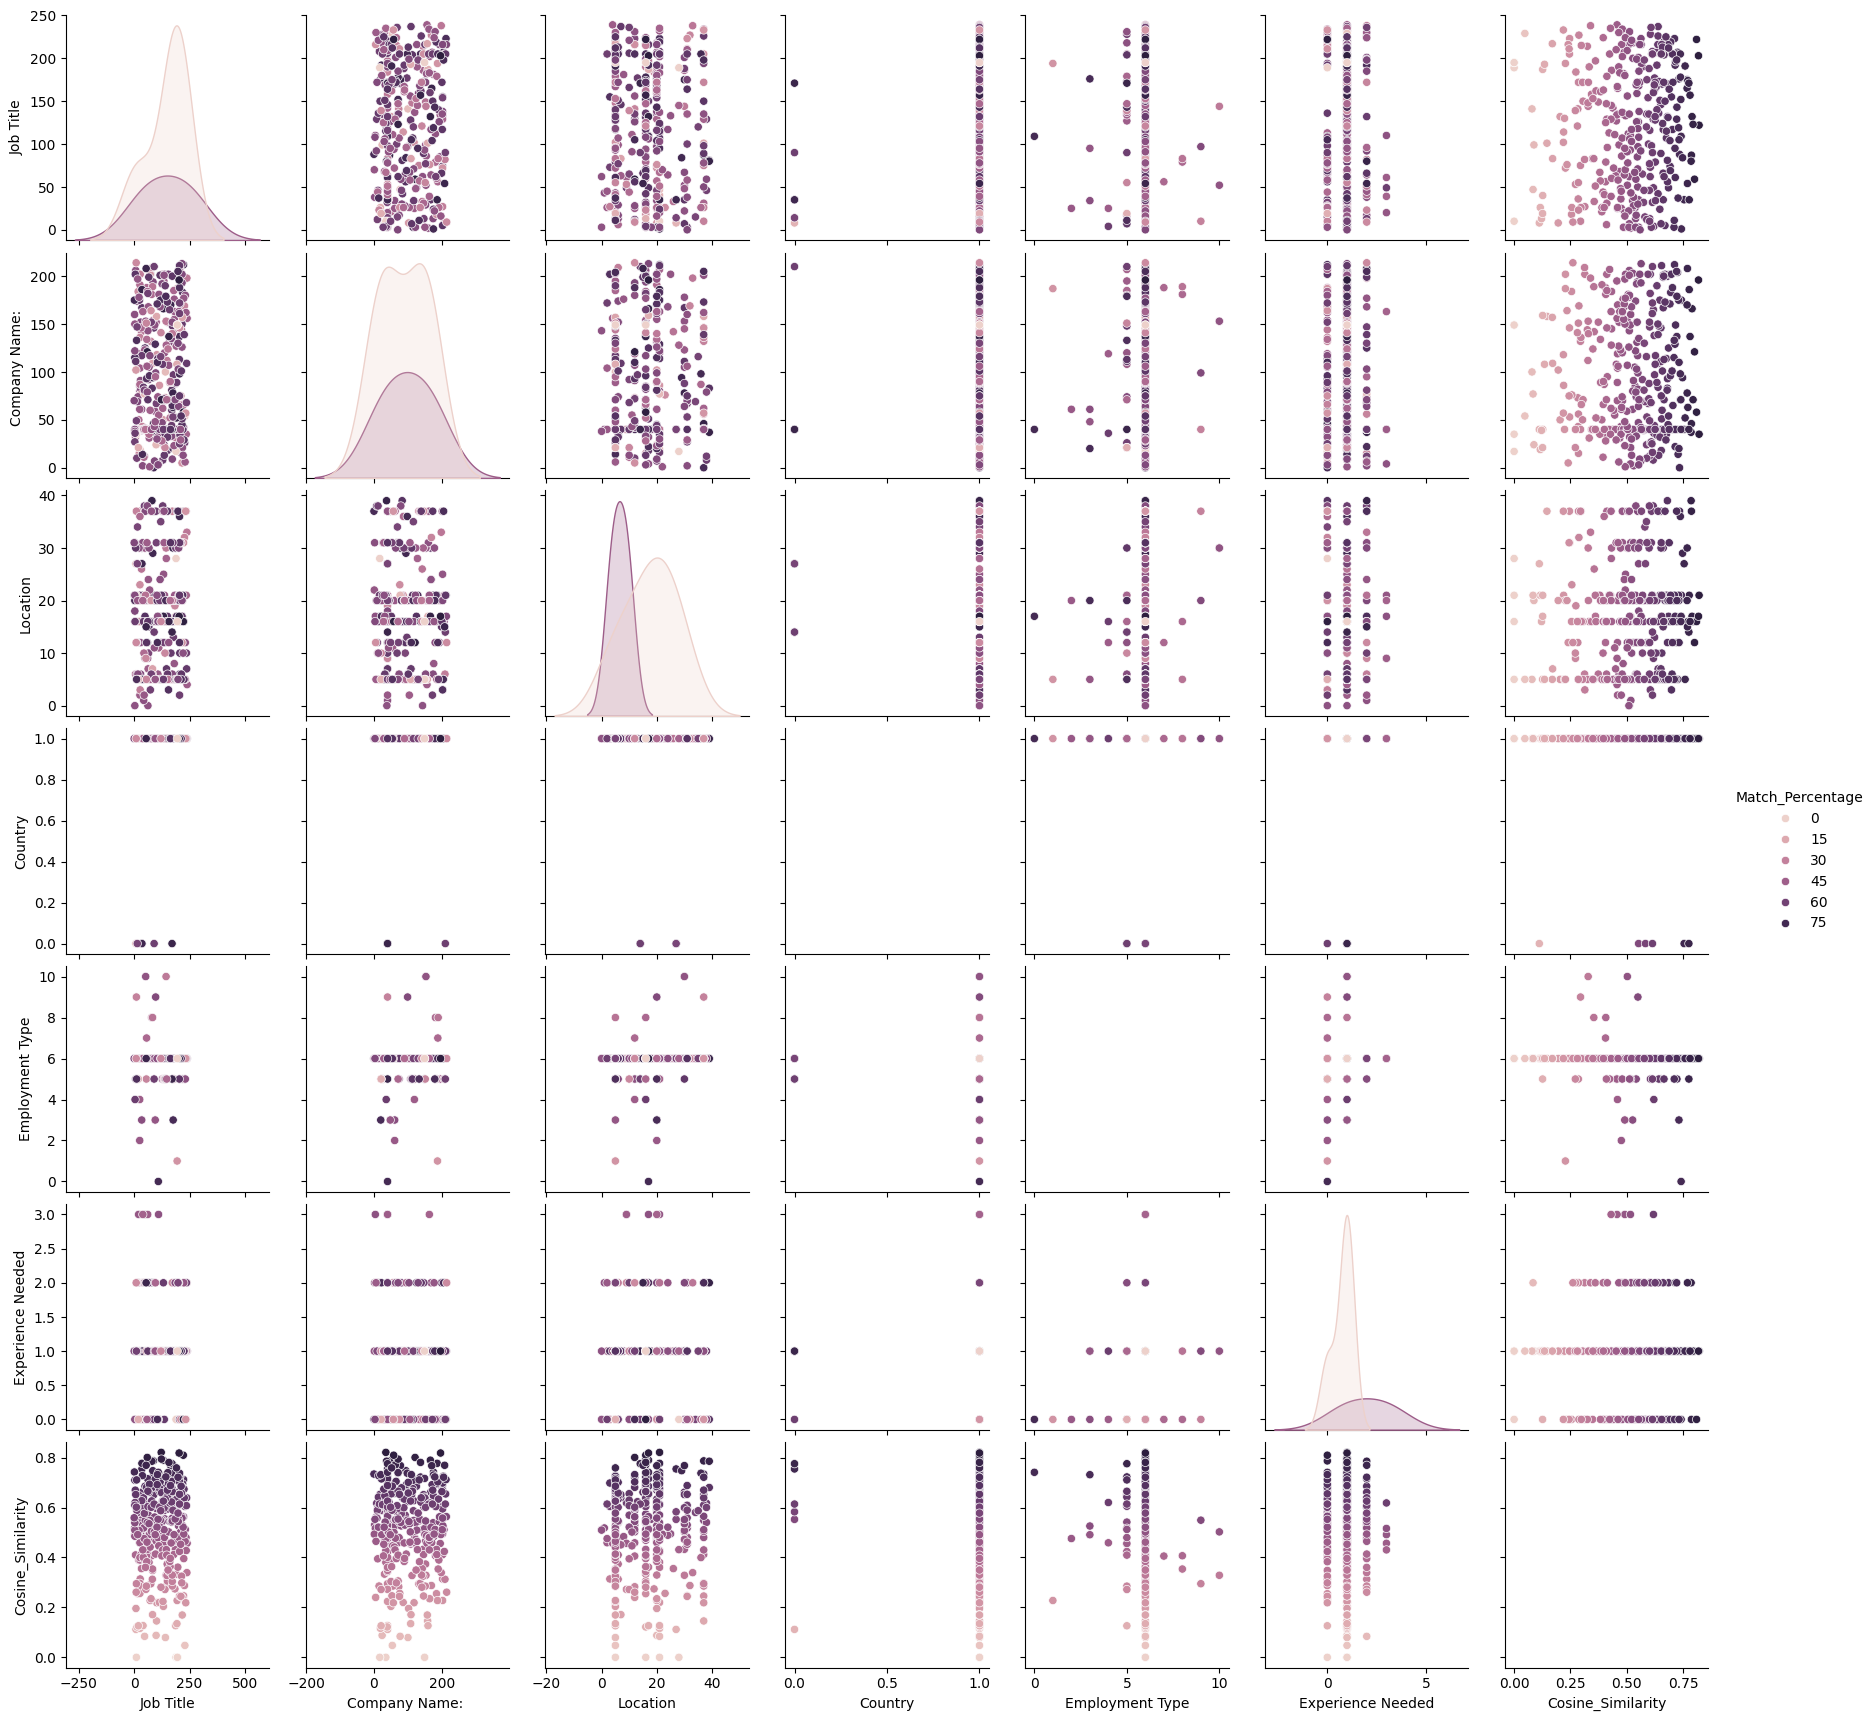

In [41]:
sns.pairplot(data1,hue="Match_Percentage")

<Axes: xlabel='Job Title', ylabel='Count'>

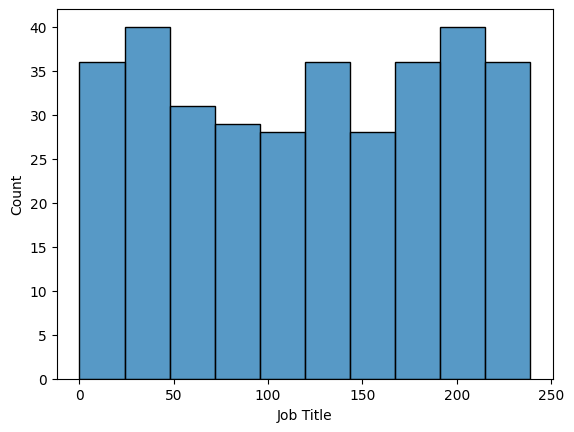

In [42]:
sns.histplot(x = 'Job Title', data = data1)

<Axes: xlabel='Cosine_Similarity', ylabel='Count'>

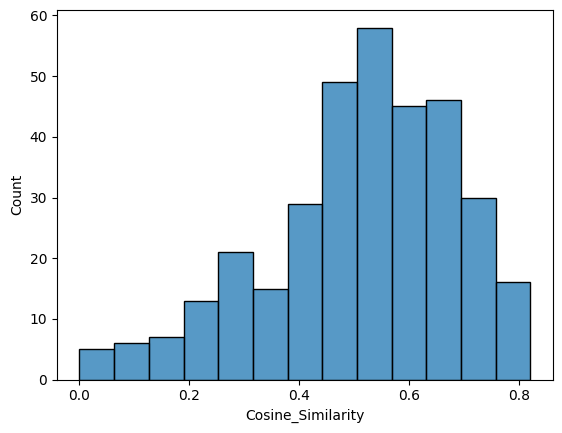

In [43]:
sns.histplot(x = 'Cosine_Similarity', data = data1)

<Axes: >

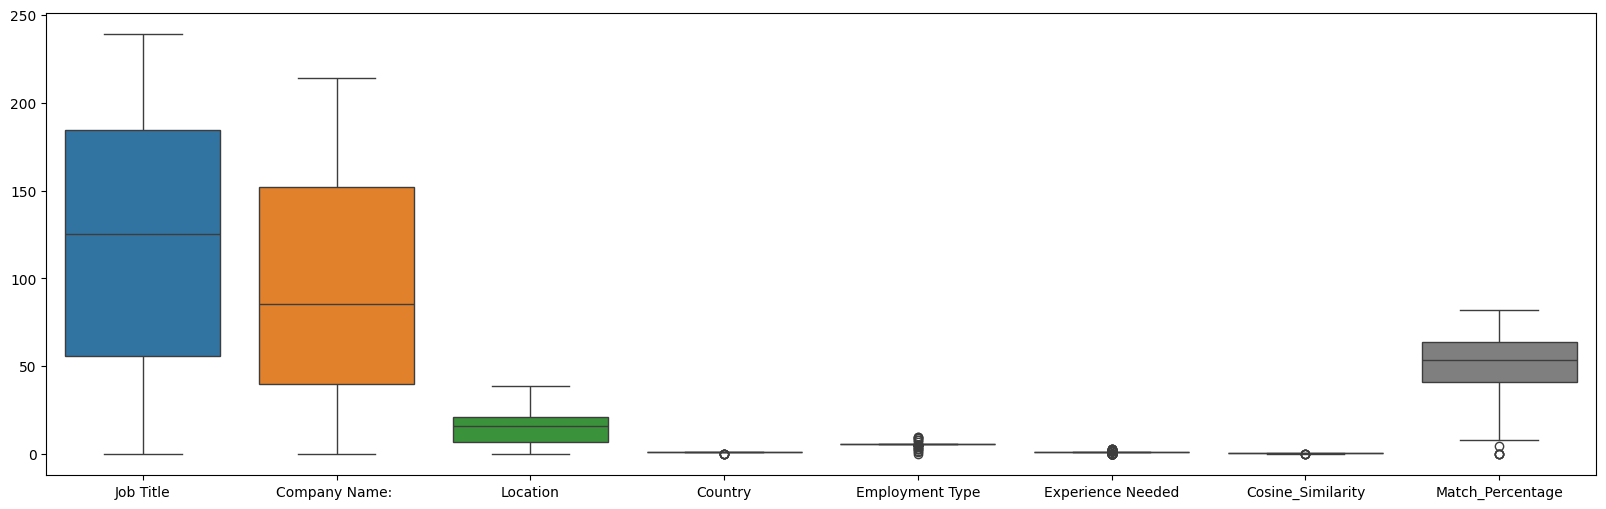

In [44]:
f,ax=plt.subplots(figsize=(20,6))
sns.boxplot(data1)

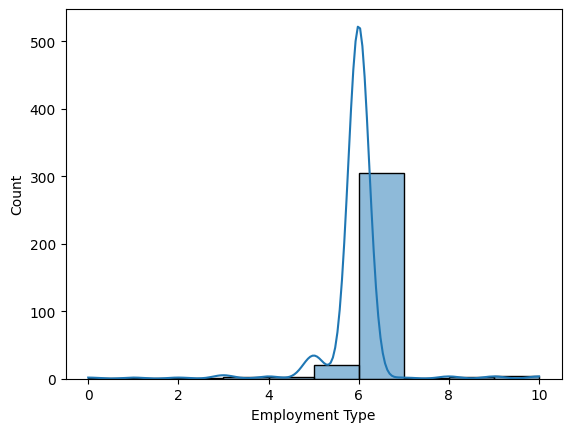

In [45]:
sns.histplot(x=data1['Employment Type'],kde = True)
plt.show()

In [46]:
#Handling outliers column
# Calculate quartiles
Q1 = data1['Employment Type'].quantile(0.25)
Q3 = data1['Employment Type'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Set a threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Identify outlierse
outliers_mask = ((data1['Employment Type']< Q1 - threshold * IQR) | (data1['Employment Type']> Q3 + threshold * IQR))

# Remove outliers
df_no_outliers = data1[~outliers_mask]


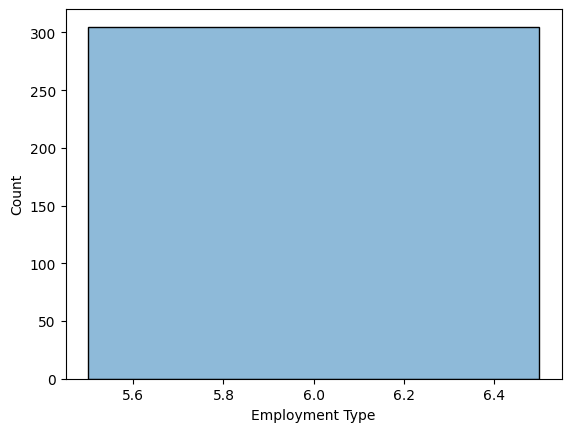

In [47]:
sns.histplot(x=df_no_outliers['Employment Type'],kde = True)
plt.show()

In [48]:
#split data to features (x) and label / target (y)

x=data1[['Job Title','Company Name: ','Location','Country','Employment Type','Experience Needed','Cosine_Similarity']]
y=data1['Match_Percentage']

In [49]:
x.head()

,Job Title,Company Name:,Location,Country,Employment Type,Experience Needed,Cosine_Similarity
0,184,40,19,1.0,6,1,0.274085
1,79,181,16,1.0,8,0,0.406870
2,56,188,12,1.0,7,0,0.405605
3,35,40,27,0.0,6,1,0.552446
4,135,24,20,1.0,6,1,0.588042


In [50]:
y.head()

,Match_Percentage
0,27.408481
1,40.686990
2,40.560503
3,55.244593
4,58.804219


In [51]:
#split data (features, label) into training data, testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.18, shuffle=True,random_state = 42)

In [52]:
from collections import Counter

In [53]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 3, 71.05166009022034: 1, 54.82719384355481: 1, 48.002037031937185: 1, 60.492469375147216: 1, 48.35934855105437: 1, 14.56884512509958: 1, 25.49044344933227: 1, 34.81612135886257: 1, 68.03841795474068: 1, 35.36765306138482: 1, 21.85436892765038: 1, 13.48853078597988: 1, 32.961464783532016: 1, 12.167048234657122: 1, 51.808256542463006: 1, 24.638810522152312: 1, 49.13647447709051: 1, 54.92793745346013: 1, 29.483196098449373: 1, 55.76059698724212: 1, 12.678681164551445: 1, 48.64634325610833: 1, 51.819495260921364: 1, 47.38820048438654: 1, 21.869506134685935: 1, 49.36380546579887: 1, 66.12484062686312: 1, 66.6493077052689: 1, 61.821031942652894: 1, 39.541316325216414: 1, 69.48249008343625: 1, 70.46905497898462: 1, 58.86696495008108: 1, 73.82265998324297: 1, 61.365295286792396: 1, 62.33197723003345: 1, 47.97166301638468: 1, 76.91391109019234: 1, 45.36186134893954: 1, 54.51226448215737: 1, 75.87451999145446: 1, 29.436268327310433: 1, 45.80056420348114: 1, 70.08622789356058: 1, 47

In [54]:
min_class = min(counter.values())
max_class = max(counter.values())

imbalance_ratio = min_class / max_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 0.33


In [55]:
!pip install smogn

In [56]:
import smogn
import pandas as pd

# Reset index of x_train to handle positional indexing issues in smogn
x_train_reset = x_train.reset_index(drop=True)

# Merge x_train and y_train into a DataFrame
train_df= pd.DataFrame(x_train_reset)
train_df['Match_Percentage'] = y_train.reset_index(drop=True)

train_smogn = smogn.smoter(
    data=train_df,
    y='Match_Percentage',  #target column
    samp_method='extreme'    #Generating samples for the 'rare' values in y
  )

# Data splitting after generation
x_train_balanced = train_smogn.drop(columns=['Match_Percentage']).values
y_train_balanced = train_smogn['Match_Percentage'].values

r_index: 100%|##########| 25/25 [00:00<00:00, 116.31it/s]


## **Model Training**

In [57]:
models = {
    'LinearRegression' : LinearRegression(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'SVR' : SVR(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [58]:
def evaluate_model(actual, predicted):
    score = r2_score(actual, predicted)
    return score

In [59]:
models_list = []
scores = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    #model ---> fit
    model.fit(x_train_balanced, y_train_balanced)

    #model ---> predict
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)

    #model evaluation
    test_score = evaluate_model(y_test, test_pred)
    train_score = evaluate_model(y_train, train_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model Training Performance : ")
    print("R2_Score = ", train_score)
    print("Model Testing Performance : ")
    print("R2_Score = ", test_score)
    scores.append(test_score)

LinearRegression
Model Training Performance : 
R2_Score =  0.996465089858369
Model Testing Performance : 
R2_Score =  0.9974482000892394
KNeighborsRegressor
Model Training Performance : 
R2_Score =  -0.2794367596844227
Model Testing Performance : 
R2_Score =  -1.3391320977797672
SVR
Model Training Performance : 
R2_Score =  -1.593466591205138
Model Testing Performance : 
R2_Score =  -2.229690853219317
DecisionTreeRegressor
Model Training Performance : 
R2_Score =  0.9996673319941162
Model Testing Performance : 
R2_Score =  0.9943402520210797
RandomForestRegressor
Model Training Performance : 
R2_Score =  0.9986899535456526
Model Testing Performance : 
R2_Score =  0.9954180746563237
AdaBoostRegressor
Model Training Performance : 
R2_Score =  0.9724307120072381
Model Testing Performance : 
R2_Score =  0.9707102704028131
XGBRegressor
Model Training Performance : 
R2_Score =  0.9996111082376489
Model Testing Performance : 
R2_Score =  0.9916297881865418


In [61]:
scores_df = pd.DataFrame(list(zip(models_list, scores)),
                        columns = ['Model', 'R2_Score']).sort_values(by = ['R2_Score'])

In [62]:
scores_df

,Model,R2_Score
2,SVR,-2.229691
1,KNeighborsRegressor,-1.339132
5,AdaBoostRegressor,0.970710
6,XGBRegressor,0.991630
3,DecisionTreeRegressor,0.994340
4,RandomForestRegressor,0.995418
0,LinearRegression,0.997448


In [63]:
# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None,5 ,10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],    # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model using grid search
grid_search.fit(x_train_balanced, y_train_balanced)

# Get the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best estimator (model with best hyperparameters)
best_rf_model = grid_search.best_estimator_

# Evaluate the model with the best parameters
y_pred = best_rf_model.predict(x_test)

# Calculate performance (e.g., r2_score)
r2_score_error = r2_score(y_test, y_pred)
print(f"r2_score Error on test set: {r2_score_error:.4f}")

Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
r2_score Error on test set: 0.9409


In [ ]:
joblib_file = "best_rf_model.pkl"
dump(best_rf_model, joblib_file)

['best_rf_model.pkl']